<a href="https://colab.research.google.com/github/DouglasPaulino99/Real-estate-price-prediction/blob/main/Personalities-clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Teste das 5 personalidades**

<img src="https://cdn.slidemodel.com/wp-content/uploads/big-five-personalities-traits-model-diagram.png" width="80%"></p>


Testes de personalidade são desenvolvidos pela psicologia a fim de identificar características intrínsecas de cada indivíduo, assim como os adquiridos durante a vida, esses testes podem ser utilizados por exemplos por recrutadores de empresas, para conhecer melhor os candidatos. O teste das 5 grandes personalidades [trabalha com 5 grandes fatores](https://www.gruposelpe.com.br/blog/metodologia-big-five-conheca-sua-origem-e-as-5-dimensoes/) que definem um indivíduo, que são eles:


*   **Abertura a novas experiências**, onde define o grau de curiosidade, aventura e amplo uso da imaginação.
*   **Conscienciosidade**, que lida com a disciplina e foco para atingir os objetivos.
* **Extroversão**, marcado pela tendência de procurar estímulos, definido por pessoas entusiastas e cheias de energia.
* **Neuroticismo**, que é a tendência de procurar emoções negativas como a raiva e tem alta tendência a depressão e instabilidade emocional.
* **Agradabilidade**, também chamada de simpatia, onde os indivíduos se preocupam com a harmonia social e tem uma visão otimista da vida.

Os indivíduous tem traços das 5 personalidades, onde padrões são usados para identificar em qual grupo cada um se identifica, entrando então a análise de dados.



# **Dados**

O banco de dados utilizado se encontra no [Kaggle](https://www.kaggle.com/datasets/tunguz/big-five-personality-test) e contém 1,015,342 respostas obtidas através de um [teste online de personalidade](https://openpsychometrics.org/tests/IPIP-BFFM/). Ele contém as perguntas que são feitas em um arquivo, e as respostas em outro.

O objetivo desse projeto é utilizar a tecnica de clusters para identificar a personalidade de cada indivíduo baseando nas respostas deles.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from io import open
pd.options.display.max_columns = 150

In [11]:
dataset = '/content/drive/MyDrive/datasets/IPIP-FFM-data-8Nov2018/data-final.csv'
data = pd.read_csv(dataset, sep='\t')

# **Análise do dataset**

Vamos começar vendo a cara do nosso dataset, identificando que tipo de dados temos e nosso *DataFrame*

Nossas colunas representam apenas 50 questões e depois são dados dos usuários, que não nos interessam. Vamos ficar só com as questões removendo todo o resto.


In [12]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [13]:
data.drop(data.columns[50:110], axis=1, inplace=True)

In [14]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


## Vamos então usar o *describe* para identificar as especificações e anomalias dos dados que possuímos

In [18]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


## O valor mínimo é igual a 0, o que é um problema, pois o nível das respostas para cada pergunta deveriam ser de 1 a 5. Eliminaremos as respostas iguais a 0.

In [20]:
data = data[(data > 0.00).all(axis=1)]
data["EXT1"].value_counts()

3.00    247835
1.00    216949
2.00    176207
4.00    166599
5.00     66844
Name: EXT1, dtype: int64

# **Modelo**

Tendo então os nossos dados limpos e da forma que desejamos, vamos começar a fazer o nosso modelo.




## Vamos importar novas bibliotecas para fazer a predição e criar um modelo para descobrir qual a quantidade de clusters recomendada.

In [ ]:
!pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


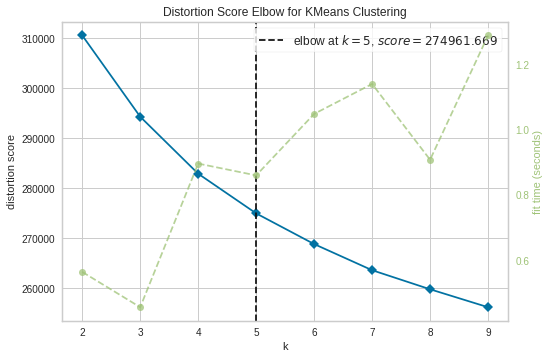

In [22]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10)) #k = grupos

data_sample = data.sample(n=5000, random_state=1)

visualizer.fit(data_sample)
visualizer.poof() #mostra a validação do numero de clusters

## De acordo com o gráfico, o número adequado de clusters é igual a 5. Esse é exatamente o número de personalidades trabalhadas.

Vamos criar um modelo com 5 clusters para separar os grupos de respostas.

In [23]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

predict = k_fit.labels_
data['Clusters'] = predict  

In [24]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,4
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,3
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,3
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,2
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,4


In [25]:
data['Clusters'].value_counts()

1    193210
4    182881
3    181095
0    169884
2    147364
Name: Clusters, dtype: int64

#**Resultados**
Existem 10 perguntas para cada traço de personalidade. Separaremos as perguntas em seus grupos para identificar os traços predominantes e assim ver o padrão de cada grupo de respostas.

In [29]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predict

data_clusters = data_soma.groupby('clusters').mean()
data_clusters

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.97,3.66,3.16,3.18,3.25
1,3.07,3.42,3.31,3.22,3.37
2,3.00,2.62,2.95,3.03,3.25
3,3.05,3.03,3.20,3.17,3.24
4,3.09,2.42,3.21,3.11,3.34


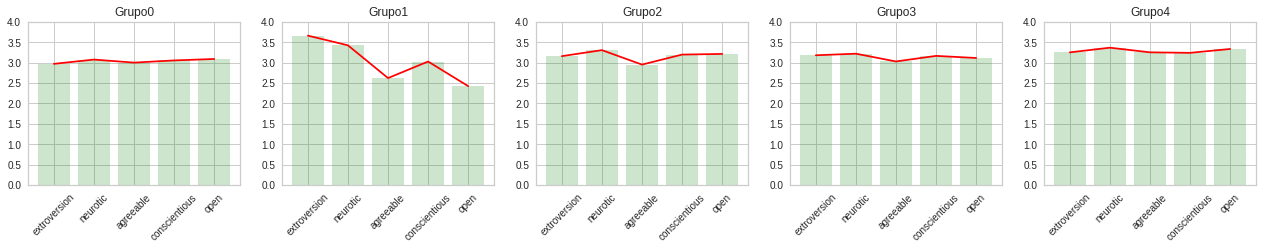

In [30]:
plt.figure(figsize=(22,3))
for i in range (0,5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)
plt.show()

#**Novas entradas** 
Com os grupos separados e bem definidos e o algoritmo treinado, vamos criar uma forma de obtenção de respostas de novos usuários

## Vamos instalar a biblioteca gradio para criar uma interface interativa onde os usuários poderão responder as perguntas do teste. Um novo arquivo foi criado, chamado de "questions" onde contem apenas as perguntas.

In [ ]:
!pip install gradio

import gradio as gr

In [36]:
dicio_questions = open("/content/drive/MyDrive/datasets/IPIP-FFM-data-8Nov2018/questions.txt").read().split("\n")

## As perguntas são divididas em listas para entrar no slider uma a uma

In [38]:
questions = []
for q in dicio_questions:
    q = str(q)
    questions.append(q[q.find("\t"):].lstrip())

questions

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

In [39]:
inputs_questions = []
for q in questions:
    obj_input = gr.inputs.Slider(minimum=1, maximum=5, step=1, default=3, label=q)
    inputs_questions.append(obj_input)
inputs_questions

[Slider(label="I am the life of the party."),
 Slider(label="I don't talk a lot."),
 Slider(label="I feel comfortable around people."),
 Slider(label="I keep in the background."),
 Slider(label="I start conversations."),
 Slider(label="I have little to say."),
 Slider(label="I talk to a lot of different people at parties."),
 Slider(label="I don't like to draw attention to myself."),
 Slider(label="I don't mind being the center of attention."),
 Slider(label="I am quiet around strangers."),
 Slider(label="I get stressed out easily."),
 Slider(label="I am relaxed most of the time."),
 Slider(label="I worry about things."),
 Slider(label="I seldom feel blue."),
 Slider(label="I am easily disturbed."),
 Slider(label="I get upset easily."),
 Slider(label="I change my mood a lot."),
 Slider(label="I have frequent mood swings."),
 Slider(label="I get irritated easily."),
 Slider(label="I often feel blue."),
 Slider(label="I feel little concern for others."),
 Slider(label="I am interested in

## Agora chamamos o modelo treinado e criamos a interface gráfica para novas respostas

In [41]:
def predict(*outputs_questions):
    outputs_questions = np.array(outputs_questions).reshape(1,-1)
    return k_fit.predict(outputs_questions)

iface = gr.Interface(
    fn = predict,
    title="Big Five Personality",
    description="Sistema de detecção de traços de personalidade usando K-Means",
    inputs = inputs_questions,
    outputs="text")


#**Resultado final**
chamamos a interface gráfica que é gerada pelo gradio

In [42]:
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://28438.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f31309e2350>,
 'http://127.0.0.1:7860/',
 'https://28438.gradio.app')

# **Conclusões**

É possível ver que o algoritmo conseguiu aprender os 5 grupos, sem que nenhuma informação prévia fosse passada e assim agrupar novos indivíduos.

O uso do Kmeans e do gradio, que gera interfaces é útil para obtenção de respostas quando se tratar por exemplo de testes de recrutadores em um RH, ou simplesmente em algum teste online. A vantagem desse último é que ele inclusive gera um link, que fica ativo por 72 horas, onde contem o modelo e a interface que o usuário vai responder